# Taller 3 

## Punto a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=0.5 #m
b=0.8 #m
V_o=40 #V
k=1.5*10**-9 #C/m^2
e_0=8.8541*10**-12 #F/m -- constante permeabilidad vacio

Se define la funcion para calcular las derivadas centrales parciales de una funcion con 2 variables y posteriormente la funcion de potencial que nos dan en el problema dependiente del radio y del angulo theta

In [3]:
h = 0.01

def dev_cen(f,r,thet):
    if(type(thet)==float): #Si thet es constante se deriva solo respecto a r
        return ( f(r+h/2,thet)-f(r-h/2,thet) )/h
    else: #De otra forma asumimos r constante y derivamos con respecto a thet
        return ( f(r,thet+h/2)-f(r,thet-h/2) )/h
    
#Funcion de potencial electrostatico en coordenadas polares
def V(r,thet):
    return (a*V_o/r)+( ( (r**3) - (a**3) )*k*np.cos(thet)/(3*e_0*r**2) )

Para el caso de angulo constante

In [4]:
r1 = np.arange(a,b,h)
thet_0 = np.pi/4

E_r = -dev_cen(V,r1,thet_0)

E_r_teo = (a*V_o)/r1**2 -((k*np.cos(thet_0))/(3*e_0))*(1+2*(a**3)/(r1**3))

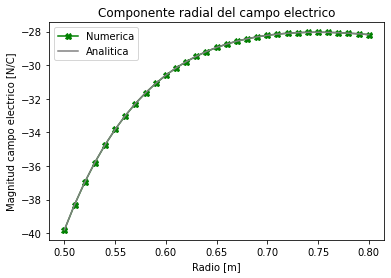

In [5]:
plt.plot(r1,E_r, "X-", c="green",label="Numerica")
plt.plot(r1, E_r_teo, c = 'gray', label="Analitica")
plt.xlabel('Radio [m]')
plt.ylabel('Magnitud campo electrico [N/C]')
plt.title('Componente radial del campo electrico')
plt.legend()
plt.savefig('AnguloConstante.png', dpi=300)
plt.show()

Para radio constante

In [6]:
h=0.1
r_0 = 0.65
thet = np.arange(0,np.pi/2,h)

E_thet = -(1/r_0)*dev_cen(V,r_0,thet)
E_thet_teo = (1/r_0)*( ( r_0**3-a**3)*k*np.sin(thet) )/(3*e_0*(r_0)**2)

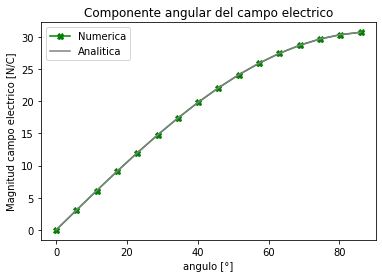

In [7]:
plt.plot(thet*(180/np.pi),E_thet, "-X", c="green",label="Numerica")
plt.plot(thet*(180/np.pi),E_thet_teo, c = 'gray', label="Analitica")
plt.xlabel('angulo [°]')
plt.ylabel('Magnitud campo electrico [N/C]')
plt.title('Componente angular del campo electrico')
plt.legend()
plt.savefig('RadioConstante.png', dpi=300)
plt.show()

## Punto b)

In [8]:
n=20 #Tamaño de los arrays para convertir a coordenadas cartesianas

#Se redefinen r1 y theta para que tengan el mismo tamaño y poder convertirlos a coordenadas cartesianas
r1 = np.arange(a,b,(b-a)/n) 
thet = np.arange(0,np.pi/2,(np.pi/2)/n)

#Se crean las listas donde se guardaran las nuevas coordenadas
x = np.zeros(n)
y = np.zeros(n)

#Se crea la lista de los campos en funcion del nuevo sistema de coordenadas
E_x = np.zeros(n)
E_y = np.zeros(n)

In [9]:
#Coordenadas
for i in range (n):
    x[i] = r1[i] *np.cos(thet[i]) 
    y[i] = r1[i]*np.sin(thet[i])
    
#Campo electroestatico en el nuevo sistema
for i in range (n):
    E_x = -dev_cen(V,x[i],y)
    E_y = -dev_cen(V,x,y[i])

In [10]:
#Dirección del campo eléctrico
u = E_x
v = E_y

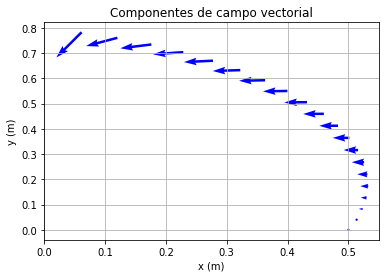

In [11]:
plt.quiver(x,y,u,v, scale_units='xy', color="blue")
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.xlim(0,0.55)
plt.title('Componentes de campo vectorial')
plt.grid()
plt.savefig('Cartesiano.png', dpi=300)
plt.show()